In [1]:
import numpy as np
import pandas as pd
import cv2 as cv
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.callbacks import EarlyStopping


In [2]:
(x_train, y_train), (x_test, y_test)= datasets.cifar10.load_data() #https://keras.io/api/datasets/cifar10/
x_train, x_test = x_train/255, x_test/255   #scale the data between 0-1

170498071/170498071 [==============================] - 19s 0us/step


In [3]:
label_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Sheep', 'Truck']


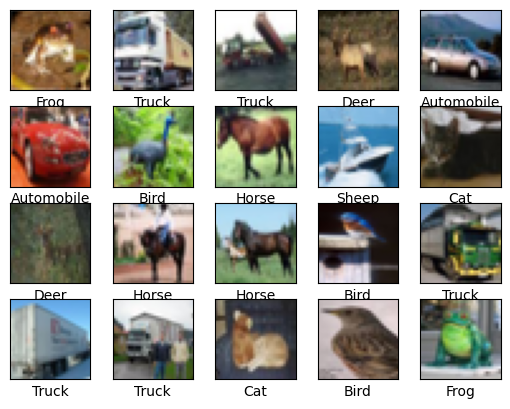

In [4]:
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(label_names[y_train[i][0]])

plt.show()

In [5]:
x_train = x_train[:30000]
y_train = y_train[:30000]
x_test = x_test[:4000]
y_test = y_test[:4000]

In [28]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))


In [29]:
#early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
938/938 [==============================] - 13s 9ms/step - loss: 1.8973 - accuracy: 0.3021 - val_loss: 1.4950 - val_accuracy: 0.4268
Epoch 2/50
938/938 [==============================] - 9s 9ms/step - loss: 1.4949 - accuracy: 0.4521 - val_loss: 1.3944 - val_accuracy: 0.5117
Epoch 3/50
938/938 [==============================] - 9s 9ms/step - loss: 1.3069 - accuracy: 0.5332 - val_loss: 1.2305 - val_accuracy: 0.5803
Epoch 4/50
938/938 [==============================] - 8s 8ms/step - loss: 1.1632 - accuracy: 0.5888 - val_loss: 1.1794 - val_accuracy: 0.5838
Epoch 5/50
938/938 [==============================] - 8s 9ms/step - loss: 1.0598 - accuracy: 0.6285 - val_loss: 1.0308 - val_accuracy: 0.6413
Epoch 6/50
938/938 [==============================] - 8s 9ms/step - loss: 0.9601 - accuracy: 0.6673 - val_loss: 0.8333 - val_accuracy: 0.7153
Epoch 7/50
938/938 [==============================] - 8s 8ms/step - loss: 0.9030 - accuracy: 0.6900 - val_loss: 0.9296 - val_accuracy: 0.6737
Epoch

In [30]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

125/125 [==============================] - 0s 3ms/step - loss: 0.7317 - accuracy: 0.8315
Loss: 0.7317458391189575
Accuracy: 0.8314999938011169


In [32]:
model.save('image_classifier.keras')

In [33]:
model = models.load_model('image_classifier.keras')

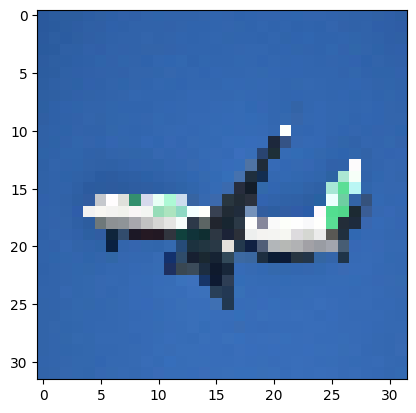

In [63]:
img = cv.imread('example_airplane_32.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img, cmap = plt.cm.binary)
plt.show()

In [64]:
prediction = model.predict(np.array([img]) / 255)
index = np.argmax(prediction)

print(f"Prediction: {label_names[index]}")
print(f"Probability: {prediction[0][index]}")

1/1 [==============================] - 0s 18ms/step
Prediction: Airplane
Probability: 1.0


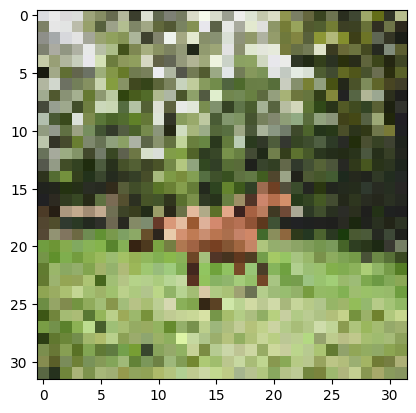

1/1 [==============================] - 0s 94ms/step
Prediction: Frog
Probability: 0.9538318514823914


In [61]:
img = cv.imread('example_horse_32.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img, cmap = plt.cm.binary)
plt.show()
prediction = model.predict(np.array([img]) / 255)
index = np.argmax(prediction)

print(f"Prediction: {label_names[index]}")
print(f"Probability: {prediction[0][index]}")

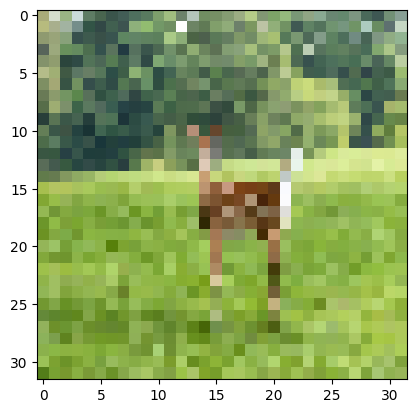

1/1 [==============================] - 0s 19ms/step
Prediction: Deer
Probability: 0.9987432360649109


In [62]:
img = cv.imread('example_deer_32.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img, cmap = plt.cm.binary)
plt.show()
prediction = model.predict(np.array([img]) / 255)
index = np.argmax(prediction)

print(f"Prediction: {label_names[index]}")
print(f"Probability: {prediction[0][index]}")

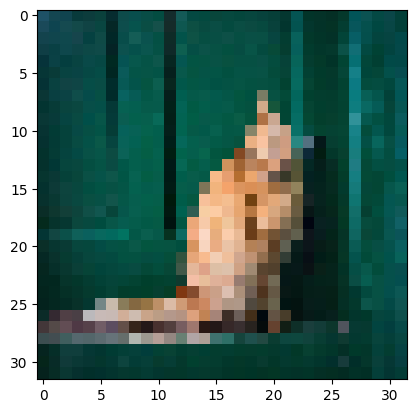

1/1 [==============================] - 0s 19ms/step
Prediction: Cat
Probability: 0.9728878736495972


In [67]:
img = cv.imread('example_cat_32.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img, cmap = plt.cm.binary)
plt.show()
prediction = model.predict(np.array([img]) / 255)
index = np.argmax(prediction)

print(f"Prediction: {label_names[index]}")
print(f"Probability: {prediction[0][index]}")

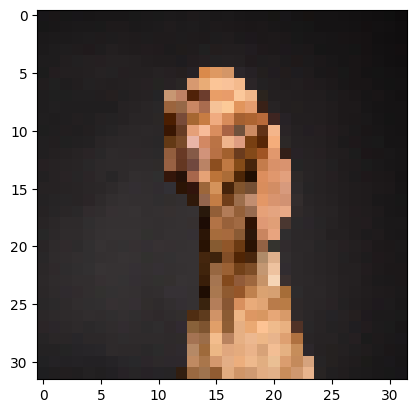

1/1 [==============================] - 0s 18ms/step
Prediction: Dog
Probability: 0.9893659353256226


In [66]:
img = cv.imread('example_dog_32.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img, cmap = plt.cm.binary)
plt.show()
prediction = model.predict(np.array([img]) / 255)
index = np.argmax(prediction)

print(f"Prediction: {label_names[index]}")
print(f"Probability: {prediction[0][index]}")

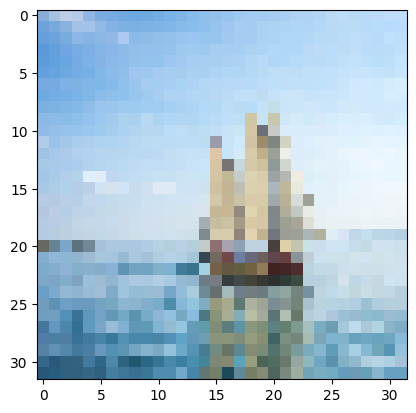

1/1 [==============================] - 0s 72ms/step
Prediction: Sheep
Probability: 0.9999731779098511


In [68]:
img = cv.imread('example_ship_32.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img, cmap = plt.cm.binary)
plt.show()
prediction = model.predict(np.array([img]) / 255)
index = np.argmax(prediction)

print(f"Prediction: {label_names[index]}")
print(f"Probability: {prediction[0][index]}")